In [1]:
pip install numpy matplotlib graphviz

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Random scalar value function

In [7]:
def f(x):
    return 3*x**2 - 4*x +5

In [7]:
xs = np.arange(-5,5,0.25) #spacing the values with a difference of 0.25
xs

array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
       -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
       -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75])

In [8]:
ys = f(xs)
ys #function apploed to all the values of fx

array([100.    ,  91.6875,  83.75  ,  76.1875,  69.    ,  62.1875,
        55.75  ,  49.6875,  44.    ,  38.6875,  33.75  ,  29.1875,
        25.    ,  21.1875,  17.75  ,  14.6875,  12.    ,   9.6875,
         7.75  ,   6.1875,   5.    ,   4.1875,   3.75  ,   3.6875,
         4.    ,   4.6875,   5.75  ,   7.1875,   9.    ,  11.1875,
        13.75  ,  16.6875,  20.    ,  23.6875,  27.75  ,  32.1875,
        37.    ,  42.1875,  47.75  ,  53.6875])

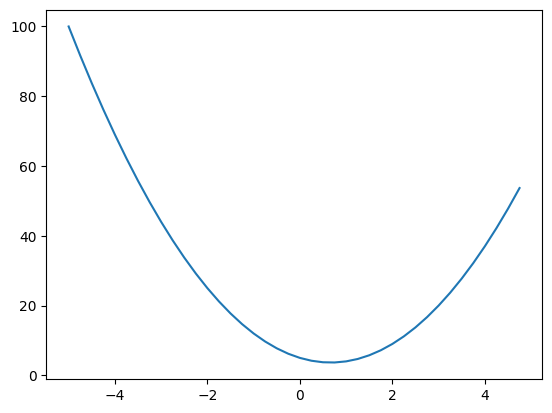

In [9]:
plt.plot(xs, ys)

In [10]:
h = 0.0001

a = 2.0
b = -3.0
c = 10.0

d1 = a*b +c 
a += h 
d2 = a*b + c 

print(d1)
print(d2)
print('slope', (d2-d1)/h) #d2-d1 shows how much the function changed  when a slightly larger value of a is added. This calculates the rate of change of output with respoect to a 

4.0
3.999699999999999
slope -3.000000000010772


In [92]:
class Value: 

    def __init__(self, data, _children=(), _op='', label=''): #initialising the class
        self.data = data
        self.grad = 0.0
        self._backward = lambda : None
        self._prev = set(_children)
        self._op = _op #Stores the operator to allow backpropagation
        self.label = label

    def __repr__(self): #returns string that represents the object
        return f"Value(data={self.data}"

    def __add__(self, other): #custom function to add the two objects of type value
        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad = 1.0 * out.grad
            other.grad = 1.0 * out.grad
        out._backward = _backward
        
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*') #(self, other) are children that have been defined in init
        def _backward():
            self.grad = other.data * out.grad
            other.grad = self.data * out.grad

        out._backward = _backward

        return out

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')

        def _backward():
            print(out.grad)
            print(1-t**2)
            self.grad = (1-t**2) * out.grad

        out._backward = _backward

        return out

    def backward(self):
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited: 
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v) 
        build_topo(self)

        self.grad = 1.0
        for node in reversed(topo):
            node._backward()



In [12]:
a = Value(2.0, label='a')
b = Value(-10.0, label='b')
a+b

Value(data=-8.0

In [21]:
a = Value(2.0, label='a')
b = Value(-10.0, label='b')
c = Value(5.0, label='c')
e = a+b; 
e.label = 'e'
d = e +c #python looks inside the Value class for __add__ and __mul__
d.label = 'd'
f = Value(-2.0, label='f')
L = d*f
L.label = 'L'
print(d)
L

Value(data=-3.0


Value(data=6.0

In [22]:
d._prev #Storing the previous values

{Value(data=-8.0, Value(data=5.0}

In [23]:
d._op

'+'

In [6]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

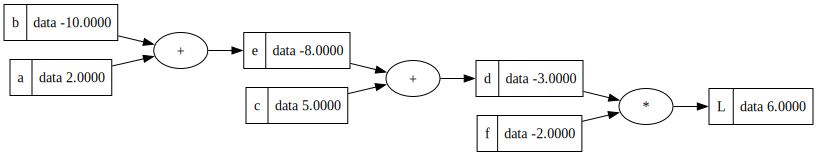

In [25]:
draw_dot(L)

Adding grad to implement weights to calculate how much changing the weight can affect L

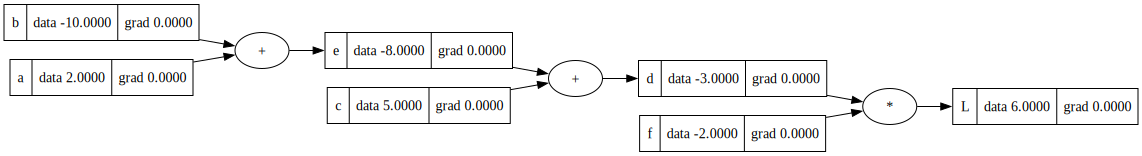

In [39]:
draw_dot(L)

In [42]:
d.grad = -2.0
f.grad = -3.0

In [43]:
L.grad = 1

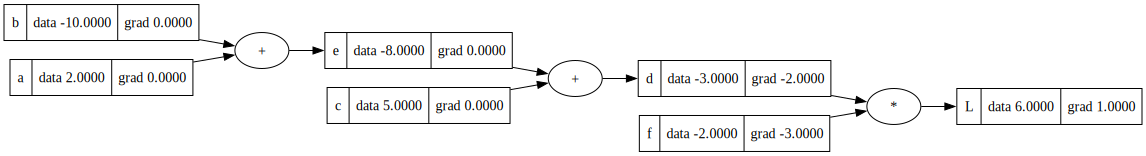

In [44]:
draw_dot(L)

In [50]:
def lol():
    
    h = 0.001

    a = Value(2.0, label='a')
    b = Value(-10.0, label='b')
    c = Value(5.0, label='c')
    e = a+b; 
    e.label = 'e'
    d = e +c #python looks inside the Value class for __add__ and __mul__
    d.label = 'd'
    f = Value(-2.0, label='f')
    L = d*f
    L.label = 'L'
    L1 = L.data

    a = Value(2.0, label='a')
    b = Value(-10.0, label='b')
    c = Value(5.0, label='c')
    e = a+b; 
    e.label = 'e'
    d = e +c #python looks inside the Value class for __add__ and __mul__
    d.label = 'd'
    d.data += h
    f = Value(-2.0, label='f')
    L = d*f
    L.label = 'L'
    L2 = L.data

    print((L2-L1)/h)

lol() #returns the value of f. Similarly if d.data was incremented by h it would reutrn f

-1.9999999999997797


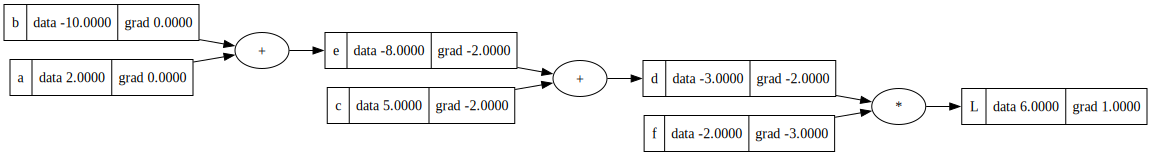

In [55]:
c.grad = -2
e.grad = -2
draw_dot(L)

In [54]:
def lol():
    
    h = 0.001

    a = Value(2.0, label='a')
    b = Value(-10.0, label='b')
    c = Value(5.0, label='c')
    e = a+b; 
    e.label = 'e'
    d = e +c #python looks inside the Value class for __add__ and __mul__
    d.label = 'd'
    f = Value(-2, label='f')
    L = d*f
    L.label = 'L'
    L1 = L.data

    a = Value(2.0, label='a')
    b = Value(-10.0, label='b')
    c = Value(5.0, label='c')
    c.data += h
    e = a+b; 
    e.label = 'e'
    d = e +c #python looks inside the Value class for __add__ and __mul__
    d.label = 'd'
    f = Value(-2.0, label='f')
    L = d*f
    L.label = 'L'
    L2 = L.data

    print((L2-L1)/h)

lol() #adding h to both c.data and e.data would return -2 

-2.0000000000024443


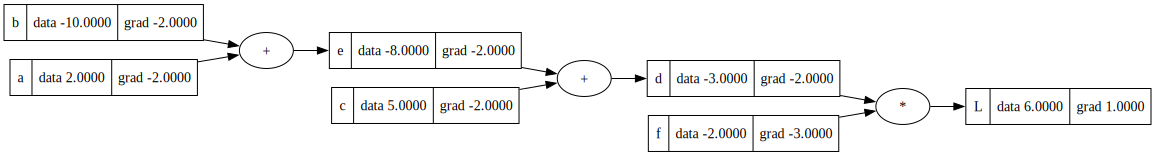

In [65]:
a.grad = (-2.0 * 1)  # ∂e/∂a = 1
b.grad = (-2.0 * 1) #Same logic as above
draw_dot(L)

In [66]:
def lol():
    
    h = 0.001

    a = Value(2.0, label='a')
    b = Value(-10.0, label='b')
    c = Value(5.0, label='c')
    e = a+b; 
    e.label = 'e'
    d = e +c #python looks inside the Value class for __add__ and __mul__
    d.label = 'd'
    f = Value(-2, label='f')
    L = d*f
    L.label = 'L'
    L1 = L.data

    a = Value(2.0, label='a')
    b = Value(-10.0, label='b')
    b.data += h
    c = Value(5.0, label='c')
    e = a+b; 
    e.label = 'e'
    d = e +c #python looks inside the Value class for __add__ and __mul__
    d.label = 'd'
    f = Value(-2.0, label='f')
    L = d*f
    L.label = 'L'
    L2 = L.data

    print((L2-L1)/h)

lol() #grad value of b

-1.9999999999988916


In [67]:
a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad
e = a+b; 
e.label = 'e'
d = e +c 
d.label = 'd'
L = d*f
L.label = 'L'

print(L.data)

6.211799999999997


Backpropogation of a neuron

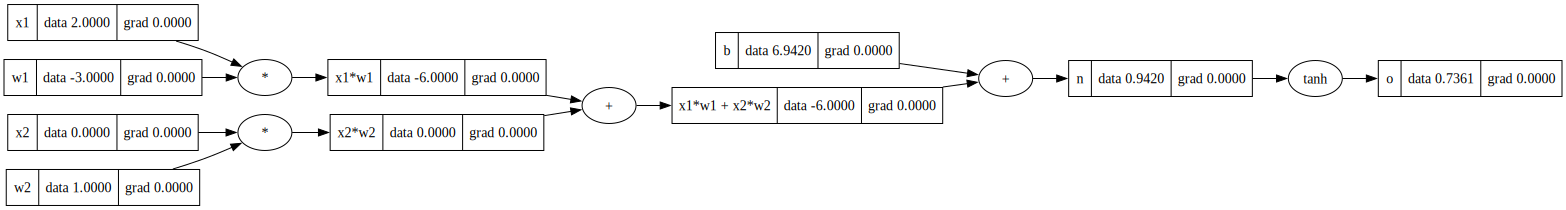

In [93]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.942012345, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh()
o.label = 'o'
draw_dot(o)

Gonna backpropagate from here

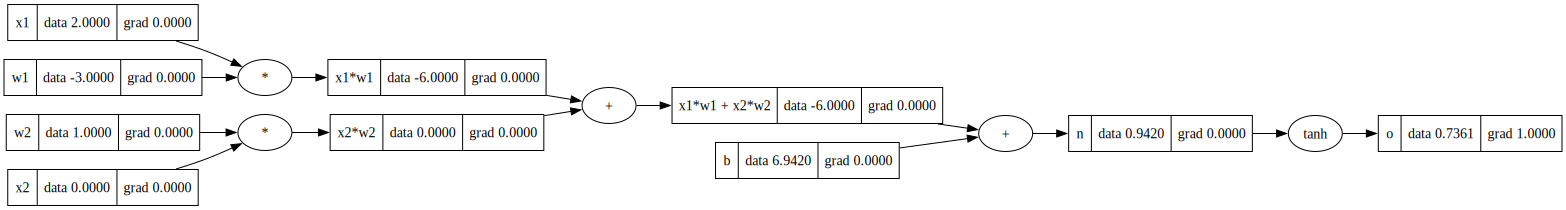

In [51]:
o.grad = 1.0 #Grad of o is 1.0 as its the final value
draw_dot(o)

In [13]:
#o = tanh(n)
#der of n = 1 - tanh(n)**2
1 - o.data**2

0.4580898703484275

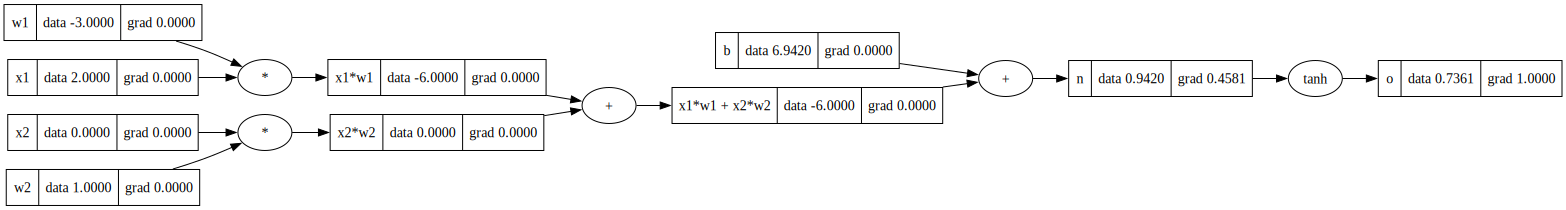

In [15]:
#from the prev operation we can derive the n.grad value
n.grad = 1 - o.data**2
draw_dot(o)

Since the operator is '+' the value will be passed down to x1w1x2w2 and b

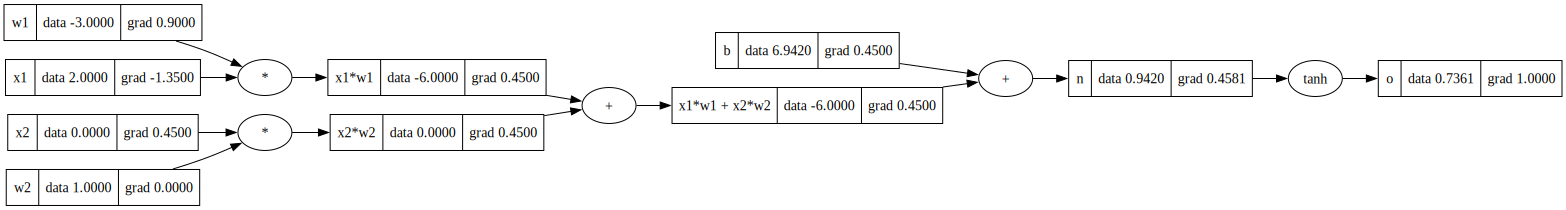

In [23]:
x1w1x2w2.grad = 0.45 #rounding off 0.458
b.grad = 0.45
draw_dot(o)

In [17]:
x1w1.grad = 0.45
x2w2.grad = 0.45 

In [21]:
x2.grad = w2.data * x2w2.grad
w2.grad = x2.data * x2w2.grad #w2 will be 0 as x2 is 0

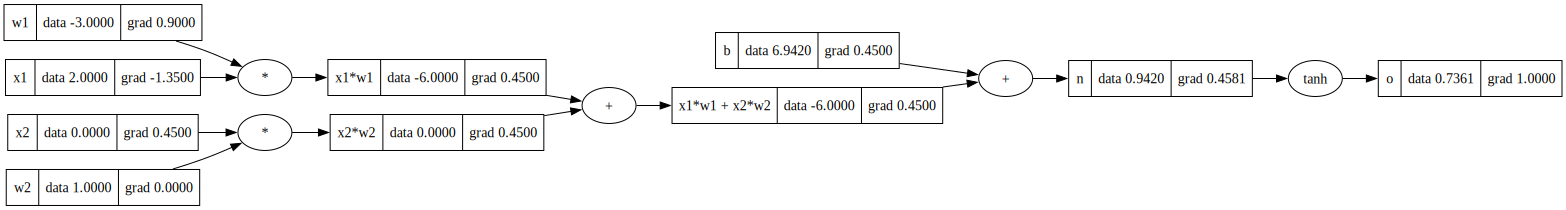

In [24]:
x1.grad = w1.data * x1w1.grad
w1.grad = x1.data * x1w1.grad
draw_dot(o) #final deravative

Trying out the newly defined backward functions 

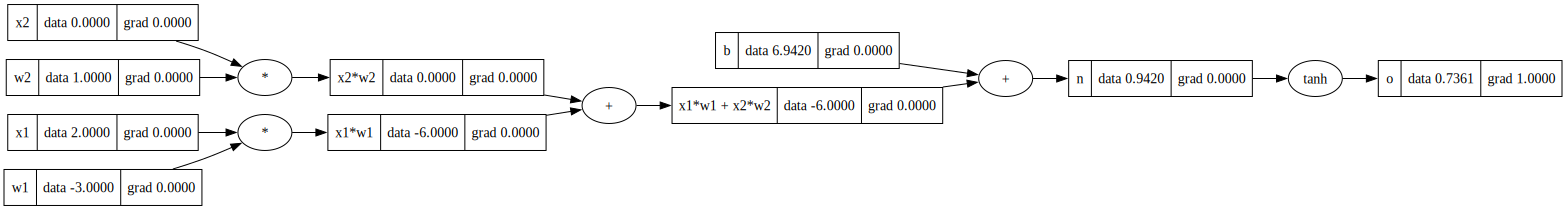

In [47]:
draw_dot(o)

1.0
0.4580898703484275
1.0
0.4580898703484275
None


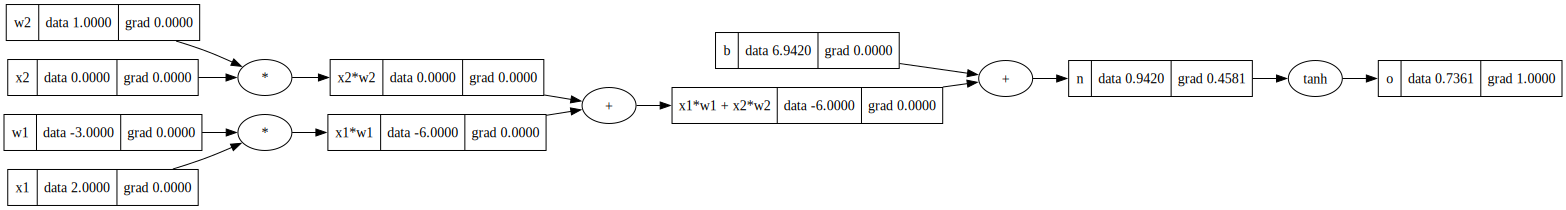

In [77]:
#Testing the backward function after declaring the o.grad value as it is 0 initially
o.grad = 1.0
o._backward()
print(o._backward())
draw_dot(o)

In [82]:
n._backward()
b._backward() #Will change nothing since it is initalized as None in the function
x1w1x2w2._backward()
x2w2._backward()
x1w1._backward()

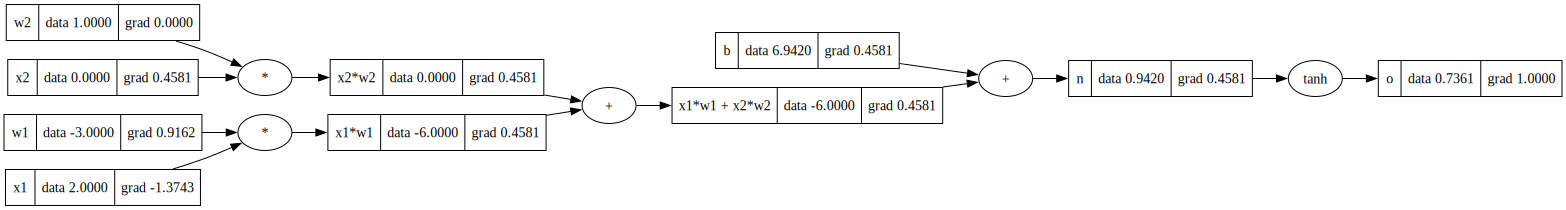

In [83]:
draw_dot(o)

We must ensure that forward nodes have an initialized gradient value before previous nodes proceed with backpropagation. This can be done by topological sort.

In [86]:
#Implementing topological sort 
topo = []
visited = set()
def build_topo(v):
  if v not in visited: #starts at o and then marks the children visited if visited
    visited.add(v)
    for child in v._prev:
      build_topo(child)
    topo.append(v) #will append o once all its children have been visited
build_topo(o)
topo

[Value(data=6.942012345,
 Value(data=2.0,
 Value(data=-3.0,
 Value(data=-6.0,
 Value(data=0.0,
 Value(data=1.0,
 Value(data=0.0,
 Value(data=-6.0,
 Value(data=0.9420123450000002,
 Value(data=0.7361454541403978]

1.0
0.4580898703484275


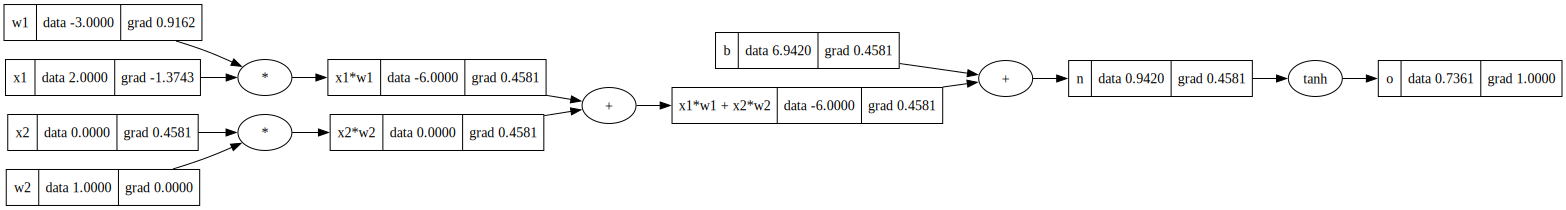

In [ ]:
o.grad = 1.0

topo = []
visited = set()
def build_topo(v):
  if v not in visited:
    visited.add(v)
    for child in v._prev:
      build_topo(child)
    topo.append(v) 

build_topo(o)

for node in reversed (topo):
    node._backward()

draw_dot(o)

1.0
0.4580898703484275


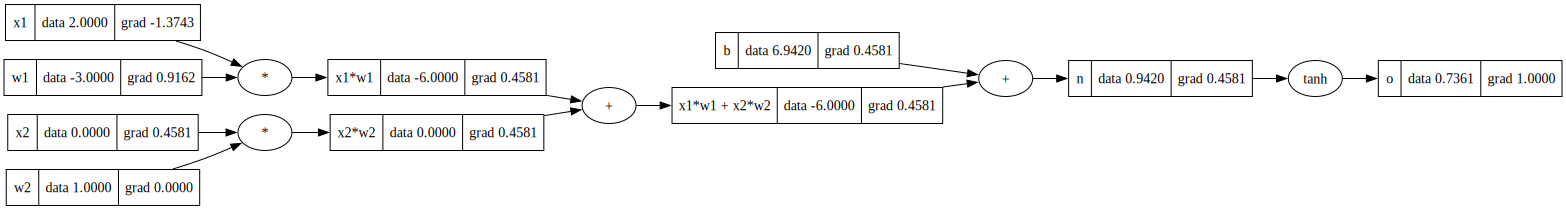

In [94]:
o.backward() #directly calling the function
draw_dot(o)

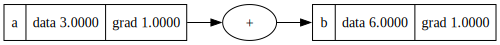

In [95]:
a = Value(3.0, label='a')
b = a + a   ; b.label = 'b'
b.backward()
draw_dot(b) #demonstrating a bug where the a+a results in the correct b.data value but the wrong grad

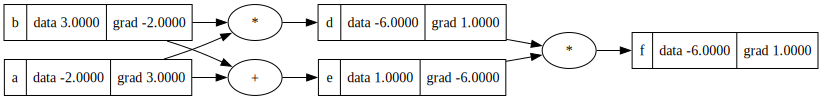

In [96]:
a = Value(-2.0, label='a')
b = Value(3.0, label='b')
d = a * b    ; d.label = 'd'
e = a + b    ; e.label = 'e'
f = d * e    ; f.label = 'f'

f.backward()

draw_dot(f) #Issue arises when variable is used more than once

In [106]:
class Value: 

    def __init__(self, data, _children=(), _op='', label=''): #initialising the class
        self.data = data
        self.grad = 0.0
        self._backward = lambda : None
        self._prev = set(_children)
        self._op = _op #Stores the operator to allow backpropagation
        self.label = label

    def __repr__(self): #returns string that represents the object
        return f"Value(data={self.data}"

    def __add__(self, other): #custom function to add the two objects of type value
        other = other if isinstance(other, Value) else Value(other) #updating function in case the other value is an integer and does not have a separate value
        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        out._backward = _backward
        
        return out

    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other), '*') #(self, other) are children that have been defined in init
        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad

        out._backward = _backward

        return out

    def __rmul__(self, other): # fallback when the user calls other * self rather than self * other as defined above
        return self * other

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')

        def _backward():
            print(out.grad)
            print(1-t**2)
            self.grad += (1-t**2) * out.grad

        out._backward = _backward

        return out

    def backward(self):
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited: 
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v) 
        build_topo(self)

        self.grad = 1.0
        for node in reversed(topo):
            node._backward()



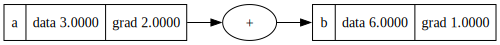

In [99]:
a = Value(3.0, label='a')
b = a + a   ; b.label = 'b'
b.backward()
draw_dot(b) #bug fixed by accumulating the gradients 

In [107]:
a = Value(2.0)
a + 1

Value(data=3.0

In [109]:
a * 1 
2 * a

Value(data=4.0